In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('dataload.py'))))

import dataload

continents = {}
countries = {}
years = {}
years['min'] = 3000
years['max'] = 0

# Start by loading fixed internet broadband subscriptions per 100 inhabitants 
dataload.loadDataset(continents, countries, years, "../dataset/Fixed_Internet_broadband_Subscriptions_per_100_inhabitants_20170325_164431694_export.csv", 3, 0)

# Load 2nd dataset with mobile cellular telephony subscriptions per 100 inhabitants 
dataload.loadDataset(continents, countries, years, "../dataset/Mobile-cellular_telephone_subscriptions_per_100_inhabitants_20170325_164502263.csv", 2, 1)

# Load 3rd data set with proportion of individuals using the Internet per 100 inhabitants
dataload.loadDataset(continents, countries, years, "../dataset/Proportion_of_individuals_using_the_Internet_20170325_164406087_export.csv", 3, 2)

# identify missing entries and fill in with zeros
dataload.missingEntries(countries, years)

# fill in missing values
dataload.fillMissing(countries, years)

Encountered 197 new countries. Loaded 2368 values - Year min 2000 max 2015
Encountered 8 new countries. Loaded 3891 values - Year min 1990 max 2015
Encountered 4 new countries. Loaded 3002 values - Year min 1990 max 2015
1083 missing years in 154 countries
706 missing values - 170 corrected


In [81]:
# Fix some mistakes
continents['Europe'].remove('Russian Federation')
continents['Europe'].remove('Jersey')
continents['Europe'].remove('Guernsey')

KeyError: 'Jersey'

Compute annual growth rate for each metric

In [3]:
for country, data in countries.items():
    for slot in range(0,3):
        for year in range(years['min'], years['max']):
            if (data[year][slot] > 0):
                rate = (data[year + 1][slot] - data[year][slot]) / data[year][slot]
                data[year + 1][slot + 3] = rate

Compute compound annual growth rate for each metric

In [4]:
for country, data in countries.items():
    for slot in range(0,3):
        startingValue = data[years['min']][slot]
        startingYear = years['min']
        for year in range(years['min'], years['max']):                
            if (data[year][slot] > 0):
                if (startingValue == 0):
                    startingValue = data[year][slot]
                    startingYear = year
                    
                if (year > startingYear):
                    rate = pow(data[year][slot] / startingValue, 1 / (year - startingYear)) - 1
                    data[year + 1][slot + 6] = rate

In [ ]:
countries['Greece']

In [111]:
import matplotlib.pyplot as plt
import numpy as np

columnData = 3

countriesPlot = {}

countryData = []
dataFixed = []
dataMobile = []
dataUsage = []

ymin = [3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000]
ymax = [0, 0, 0, 0, 0, 0, 0, 0, 0]

x = np.arange(years['min'], years['max'], 1);
for country in continents['Europe']:
    totCountryData = []
    
    thisCountryData = []
    thisCountryData.append(country)
    thisDataFixed = []
    thisDataFixed.append(country)
    thisDataMobile = []
    thisDataMobile.append(country)
    thisDataUsage = []
    thisDataUsage.append(country)
        
    for slot in range(0,9):    
        thisSlot = []

        y = []
        for year in range(years['min'], years['max']):
            y.append(countries[country][year][slot])
            thisCountryData.append(countries[country][year][slot])
            if (slot % 3 == 0):
                thisDataFixed.append(countries[country][year][slot])
            elif (slot % 3 == 1):
                thisDataMobile.append(countries[country][year][slot])
            else:
                thisDataUsage.append(countries[country][year][slot])
            
            if (countries[country][year][slot] > ymax[slot]):
                ymax[slot] = countries[country][year][slot]
            
            if (countries[country][year][slot] < ymin[slot]):
                ymin[slot] = countries[country][year][slot]
            
        totCountryData.append(y)
                    
    countriesPlot[country] = totCountryData
    countryData.append(thisCountryData)
    dataFixed.append(thisDataFixed)
    dataMobile.append(thisDataMobile)
    dataUsage.append(thisDataUsage)

In [61]:
len(countriesPlot)

45

In [83]:
ymax

[46.76088898,
 208.936113191951,
 98.16,
 24.077343326905215,
 76.16990945803974,
 2.90134373717649,
 24.07734332690522,
 76.16990945803974,
 1.8554421778097958]

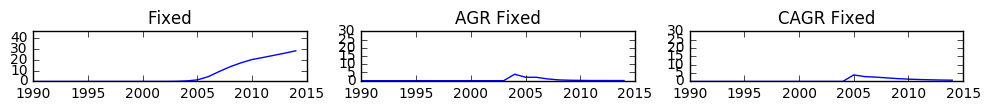

In [75]:
x = np.arange(years['min'], years['max'], 1);
plt.figure(figsize=(12,3))
plt.subplot(434)
plt.title("Fixed")
plt.ylim(ymin[0],ymax[0])
plt.plot(x, countriesPlot['Greece'][0])
plt.subplot(435)
plt.title("AGR Fixed")
plt.ylim(ymin[3],ymax[3])
plt.plot(x, countriesPlot['Greece'][3])
plt.subplot(436)
plt.title("CAGR Fixed")
plt.ylim(ymin[6],ymax[6])
plt.plot(x, countriesPlot['Greece'][6])
plt.show()    

In [113]:
dataFixed[1]

['Spain',
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.189554716,
 1.144843145,
 3.017157,
 5.050306713,
 7.9639125,
 11.60519889,
 15.30278446,
 17.89010616,
 20.01221792,
 21.21482664,
 22.80754262,
 23.74688312,
 24.927835254999998,
 26.10878739,
 27.63110934,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.039644748274161,
 1.6354326469762808,
 0.6738627499331324,
 0.5769166018174864,
 0.45722330450014365,
 0.31861457998674586,
 0.16907522332050143,
 0.1186192938723178,
 0.06009372498378216,
 0.07507560665129251,
 0.04118551988044033,
 0.04973082694820617,
 0.04737483712161199,
 0.05830688063985182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.039644748274161,
 2.9896211531598538,
 1.986719151905476,
 1.5459388687342126,
 1.277107841193681,
 1.0789273425706156,
 0.9148090649968421,
 0.7903794265823894,
 0.6891028677295994,
 0.6144863967820566,
 0.5513708906983865,
 0.5016861120590832,
 0.460637578797219]

In [84]:
totGroups = 7

Cluster data based on all 9 data columns

In [105]:
from sklearn.cluster import KMeans 
totColumns = len(countryData[0])-1
kmeansAll = KMeans(n_clusters=totGroups, init='k-means++', random_state=1) # initialization
kmeansAll.fit([row[1:totColumns] for row in countryData]) # actual execution
cAll = kmeansAll.predict([row[1:totColumns] for row in countryData])

In [114]:
totColumns = len(dataFixed[0])-1
kmeansFixed = KMeans(n_clusters=totGroups, init='k-means++', random_state=1) # initialization
kmeansFixed.fit([row[1:totColumns] for row in dataFixed]) # actual execution
cFixed = kmeansFixed.predict([row[1:totColumns] for row in dataFixed])

In [115]:
totColumns = len(dataMobile[0])-1
kmeansMobile = KMeans(n_clusters=totGroups, init='k-means++', random_state=1) # initialization
kmeansMobile.fit([row[1:totColumns] for row in dataMobile]) # actual execution
cMobile = kmeansMobile.predict([row[1:totColumns] for row in dataMobile])

In [117]:
totColumns = len(dataUsage[0])-1
kmeansUsage = KMeans(n_clusters=totGroups, init='k-means++', random_state=1) # initialization
kmeansUsage.fit([row[1:totColumns] for row in dataUsage]) # actual execution
cUsage = kmeansUsage.predict([row[1:totColumns] for row in dataUsage])

In [122]:
countryGroup = []
countryGroupDict = {}
for row in range(0, len(countryData)):
    line = []
    line.append(countryData[row][0])
    line.append(cAll[row])
    line.append(cFixed[row])
    line.append(cMobile[row])
    line.append(cUsage[row])
    countryGroup.append(line)
    countryGroupDict[countryData[row][0]] = line
    print(countryData[row][0], line)

Moldova, Republic of ['Moldova, Republic of', 1, 2, 2, 2]
Spain ['Spain', 0, 1, 5, 3]
Finland ['Finland', 6, 5, 3, 6]
Sweden ['Sweden', 6, 0, 5, 6]
Lithuania ['Lithuania', 5, 1, 4, 4]
Poland ['Poland', 5, 4, 1, 4]
Bosnia and Herzegovina ['Bosnia and Herzegovina', 3, 3, 0, 0]
Liechtenstein ['Liechtenstein', 0, 0, 6, 1]
Latvia ['Latvia', 0, 1, 1, 3]
Gibraltar ['Gibraltar', 2, 2, 1, 2]
Faroe Islands ['Faroe Islands', 6, 5, 1, 1]
United Kingdom ['United Kingdom', 2, 2, 5, 2]
Malta ['Malta', 0, 5, 1, 4]
Albania ['Albania', 3, 6, 0, 0]
Romania ['Romania', 3, 4, 0, 0]
San Marino ['San Marino', 0, 1, 6, 5]
Iceland ['Iceland', 6, 0, 5, 6]
Austria ['Austria', 6, 1, 3, 1]
Luxembourg ['Luxembourg', 6, 5, 3, 1]
Belgium ['Belgium', 0, 5, 5, 1]
Czechia ['Czechia', 4, 4, 2, 3]
Italy ['Italy', 5, 1, 3, 4]
Serbia ['Serbia', 3, 3, 0, 0]
Ukraine ['Ukraine', 3, 3, 0, 0]
Slovenia ['Slovenia', 0, 1, 5, 3]
Belarus ['Belarus', 3, 4, 0, 0]
Norway ['Norway', 6, 0, 5, 6]
France ['France', 0, 5, 6, 3]
Portugal ['P

In [126]:
for group in range(0,totGroups):
    print("== Group", group, "================================")
    for name in [row for row in countryGroup if row[4]==group]:
        print(name[0])

== Group 0 ================================
Bosnia and Herzegovina
Albania
Romania
Serbia
Ukraine
Belarus
Montenegro
Bulgaria
Greece
== Group 1 ================================
Liechtenstein
Faroe Islands
Austria
Luxembourg
Belgium
Monaco
Estonia
Germany
== Group 2 ================================
Moldova, Republic of
Gibraltar
United Kingdom
Macedonia, Republic of
== Group 3 ================================
Spain
Latvia
Czechia
Slovenia
France
Andorra
Slovakia
Ireland
Hungary
== Group 4 ================================
Lithuania
Poland
Malta
Italy
Portugal
Croatia
== Group 5 ================================
San Marino
== Group 6 ================================
Finland
Sweden
Iceland
Norway
Denmark
Switzerland
Netherlands


== Group 0 ================================
Spain


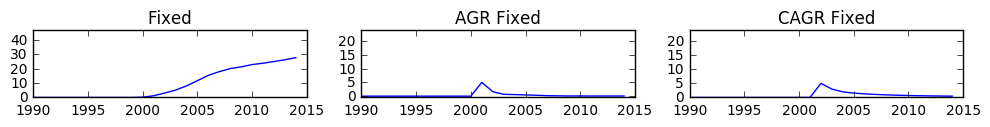

Liechtenstein


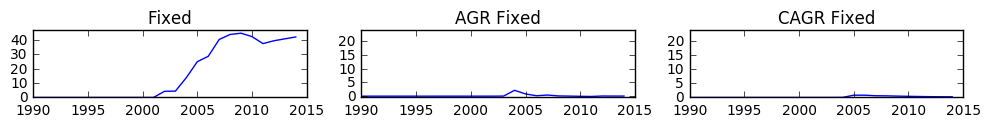

Latvia


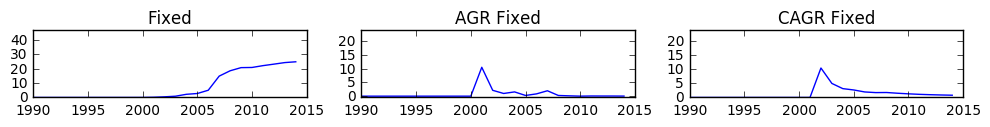

Malta


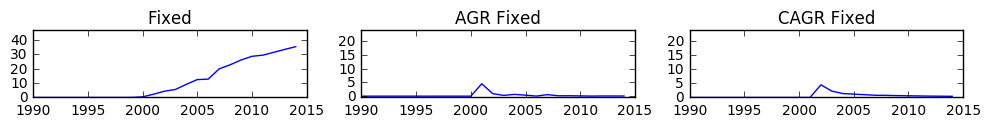

San Marino


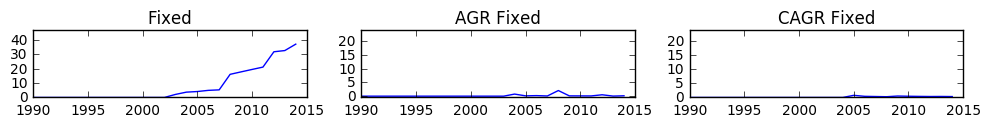

Belgium


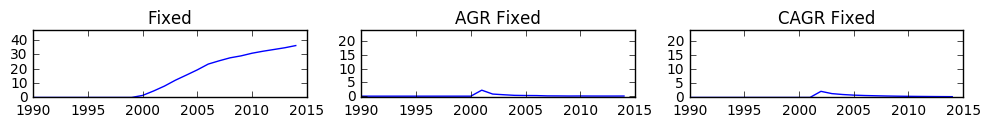

Slovenia


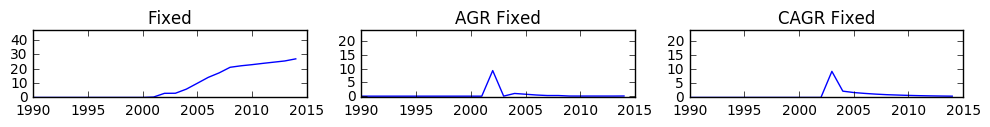

France


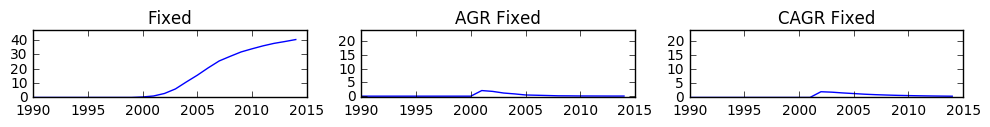

Portugal


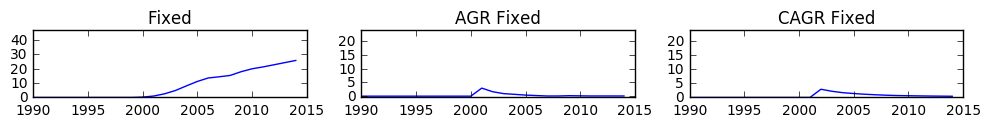

Andorra


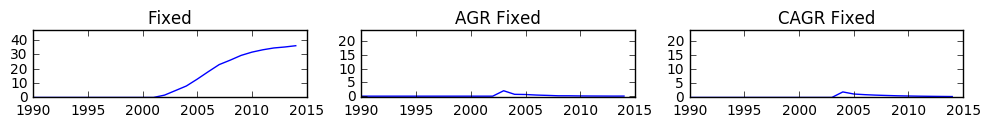

Monaco


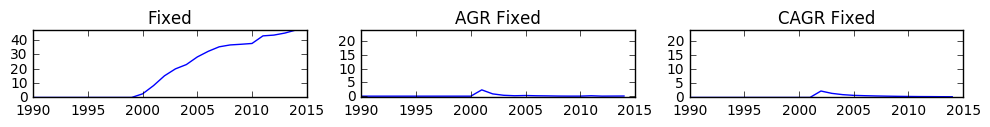

Croatia


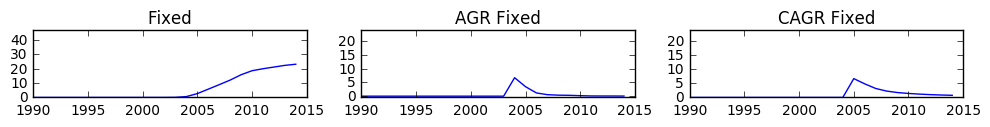

Ireland


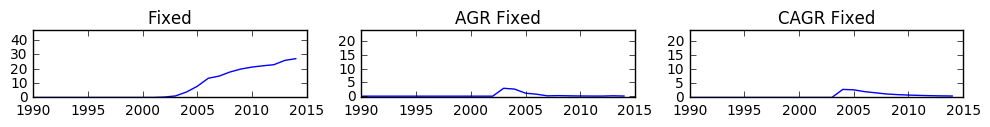

Greece


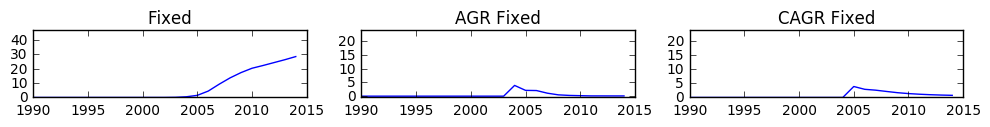

Hungary


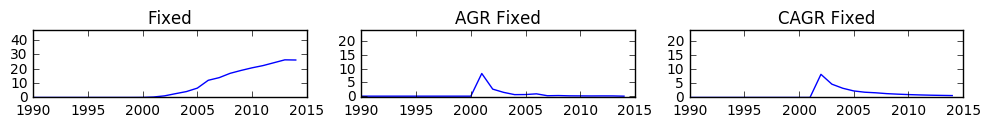

== Group 1 ================================
Moldova, Republic of


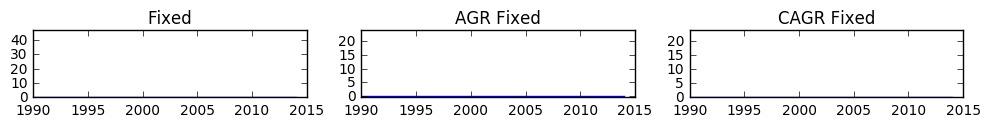

Macedonia, Republic of


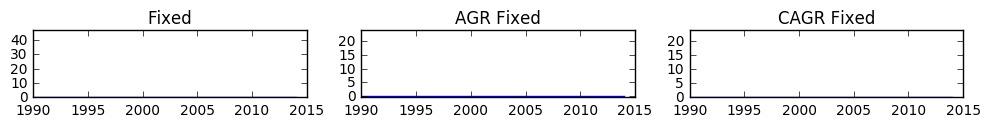

== Group 2 ================================
Gibraltar


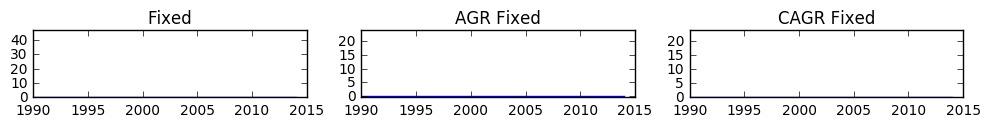

United Kingdom


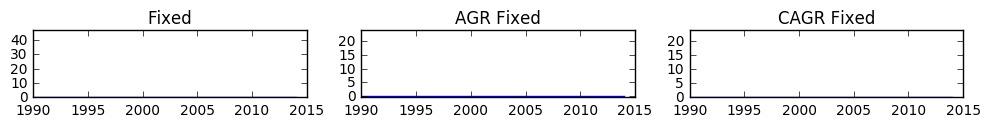

== Group 3 ================================
Bosnia and Herzegovina


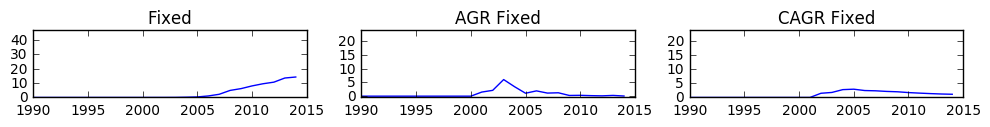

Albania


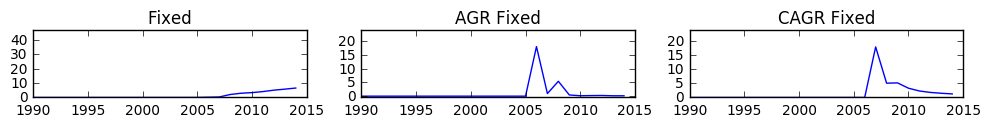

Romania


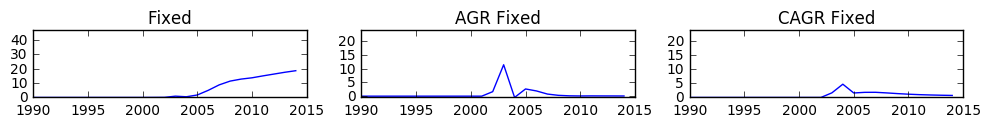

Serbia


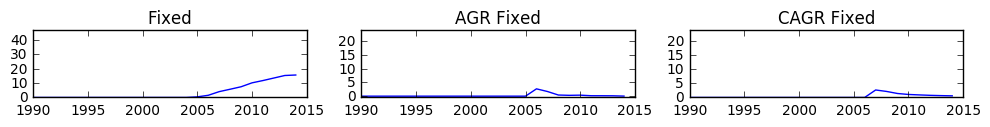

Ukraine


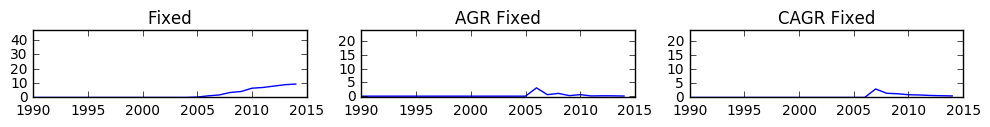

Belarus


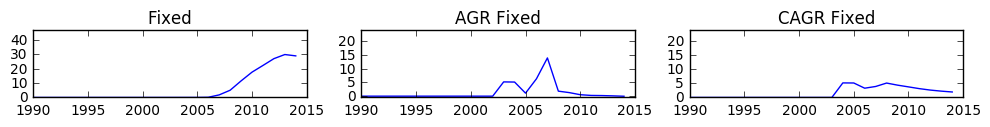

== Group 4 ================================
Czechia


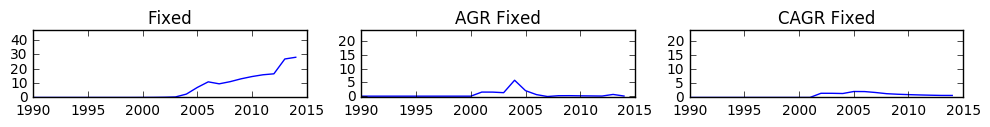

Slovakia


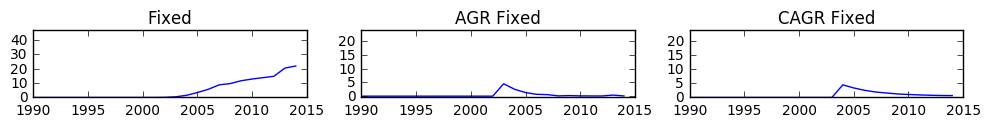

== Group 5 ================================
Lithuania


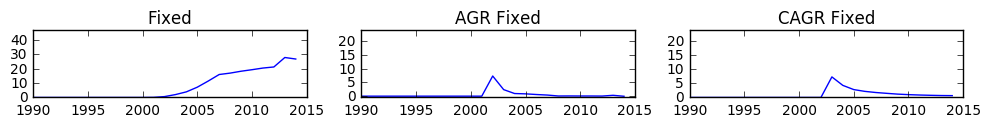

Poland


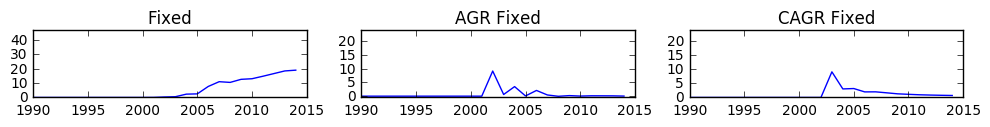

Italy


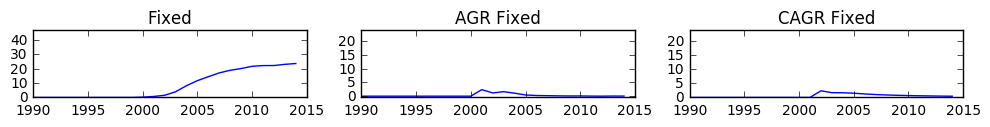

Montenegro


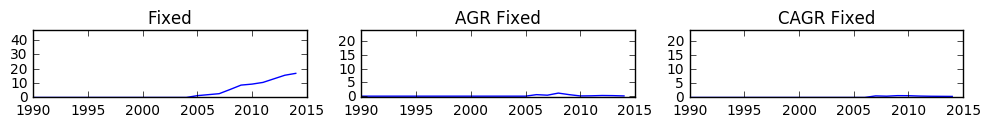

Bulgaria


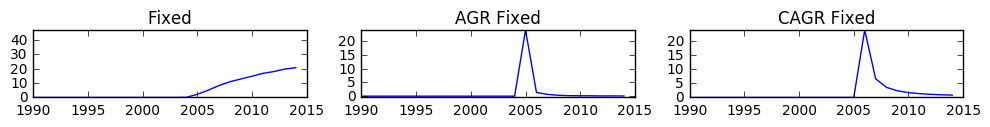

== Group 6 ================================
Finland


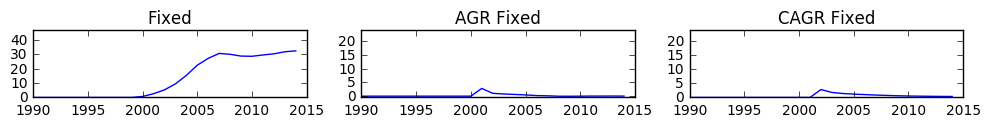

Sweden


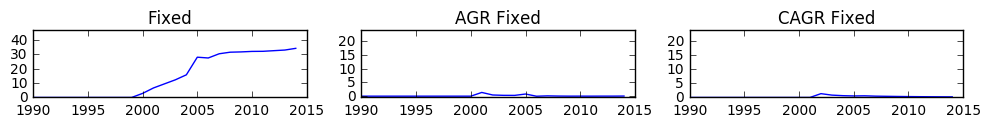

Faroe Islands


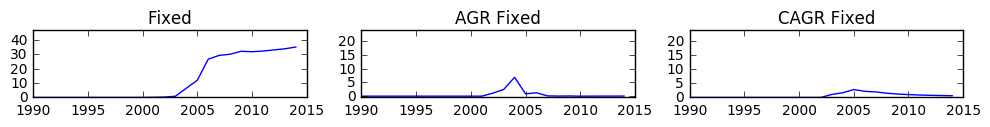

Iceland


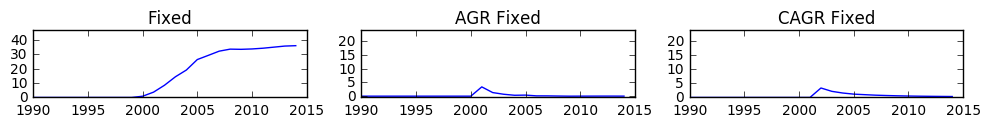

Austria


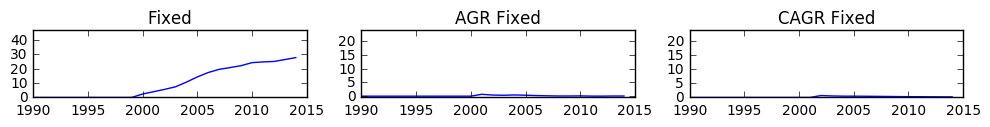

Luxembourg


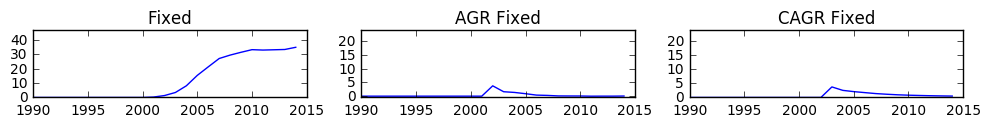

Norway


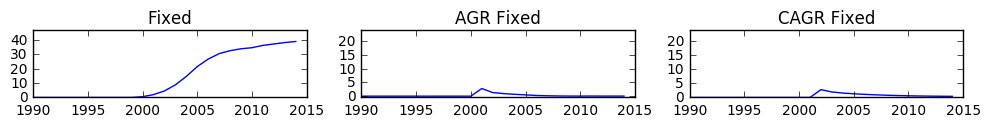

Estonia


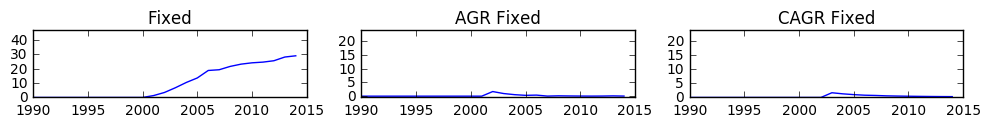

Denmark


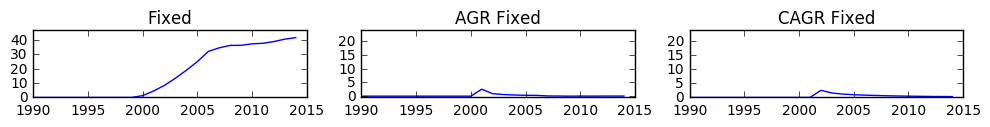

Switzerland


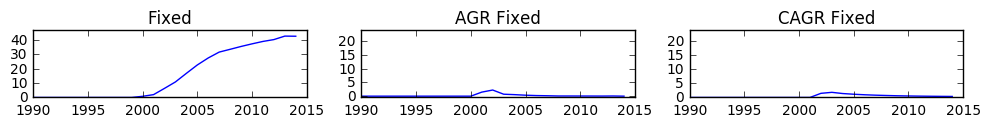

Germany


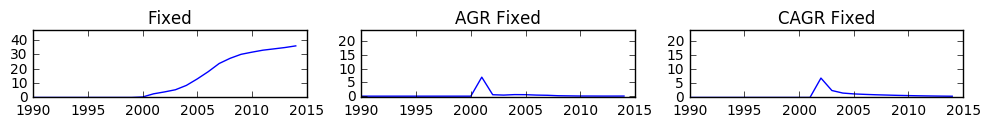

Netherlands


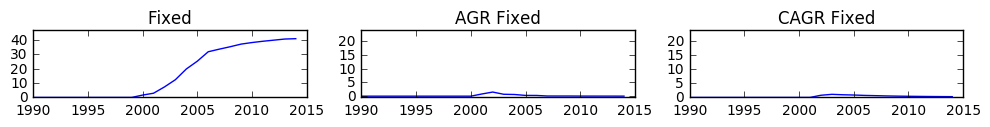

In [89]:
x = np.arange(years['min'], years['max'], 1);
for group in range(0,totGroups):
    print("== Group", group, "================================")
    for name in [row for row in mergedata if row[totColumns+1]==group]:
        #y = countriesPlot[name[0]]
        #plt.figure(figsize=(3,1))
        #plt.title(name[0] + " AGR for Fixed")
        #plt.plot(x, y)
        #plt.show()             
        print(name[0])
        plt.figure(figsize=(12,4))      
        plt.subplot(434)
        plt.title("Fixed")
        plt.ylim(ymin[0],ymax[0])
        plt.plot(x, countriesPlot[name[0]][0])
        plt.subplot(435)
        plt.title("AGR Fixed")
        plt.ylim(ymin[3],ymax[3])
        plt.plot(x, countriesPlot[name[0]][3])
        plt.subplot(436)
        plt.title("CAGR Fixed")
        plt.ylim(ymin[6],ymax[6])
        plt.plot(x, countriesPlot[name[0]][6])        
        plt.show()            

== Group 0 ================================
Spain


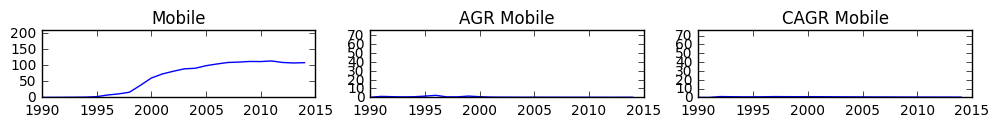

Liechtenstein


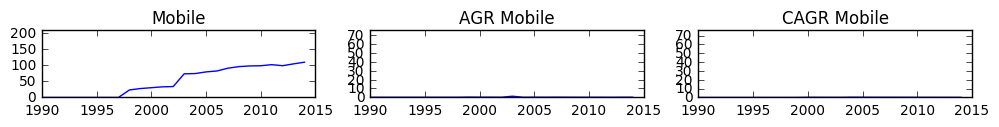

Latvia


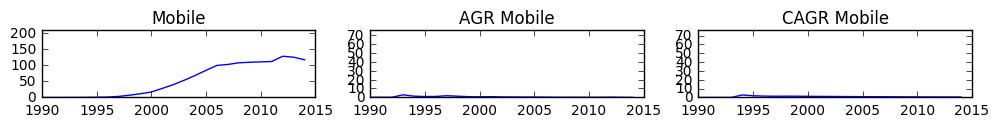

Malta


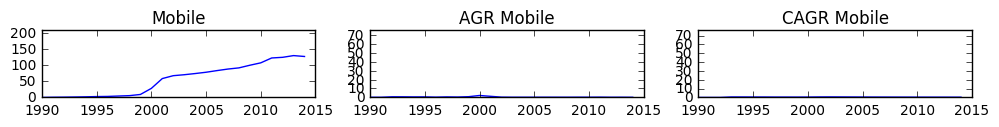

San Marino


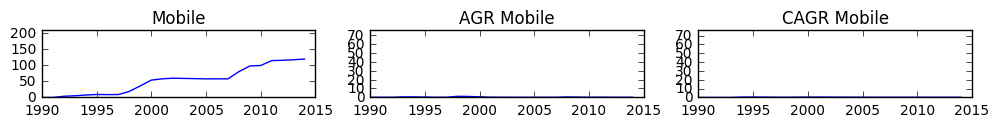

Belgium


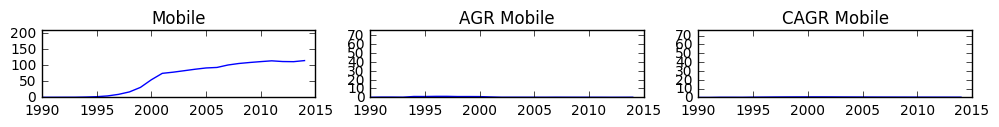

Slovenia


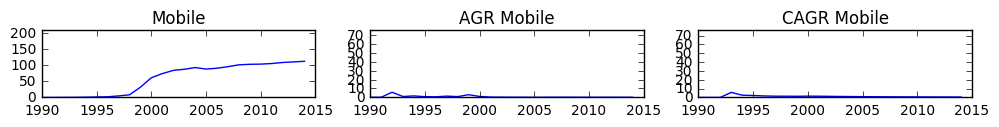

France


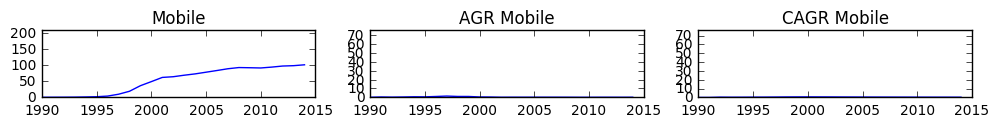

Portugal


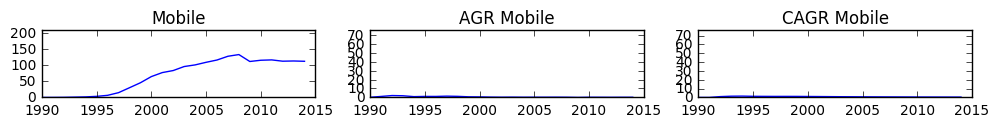

Andorra


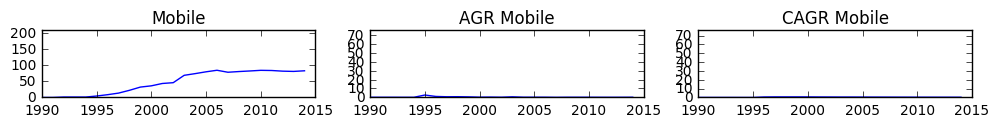

Monaco


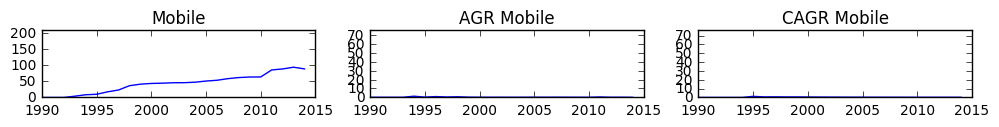

Croatia


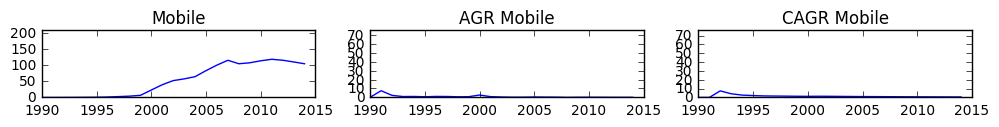

Ireland


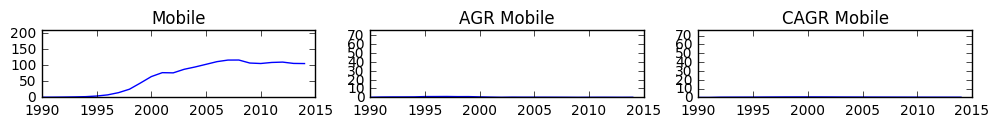

Greece


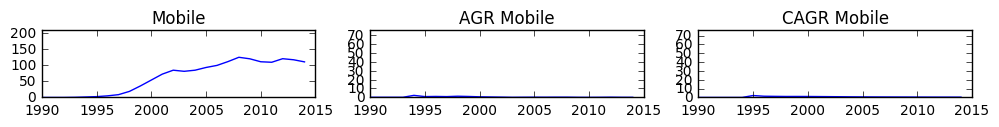

Hungary


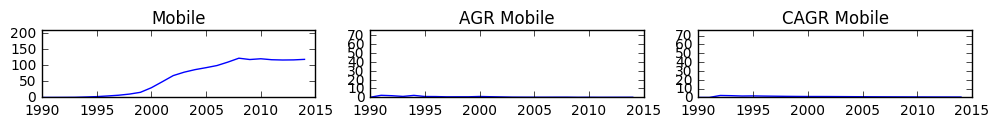

== Group 1 ================================
Moldova, Republic of


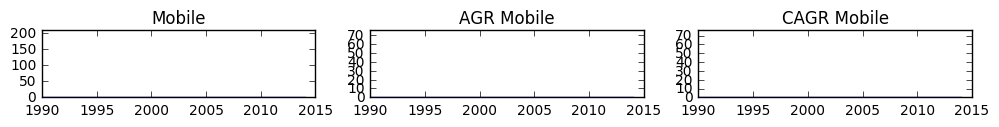

Macedonia, Republic of


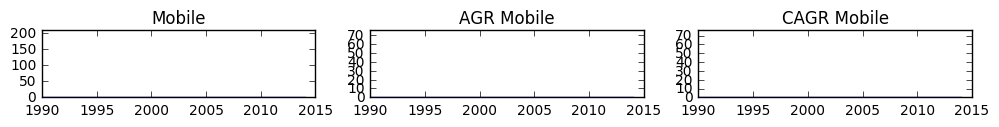

== Group 2 ================================
Gibraltar


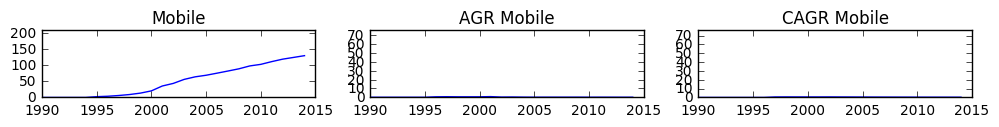

United Kingdom


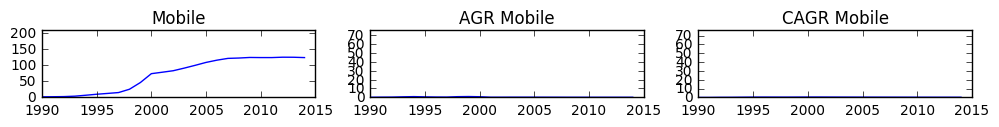

== Group 3 ================================
Bosnia and Herzegovina


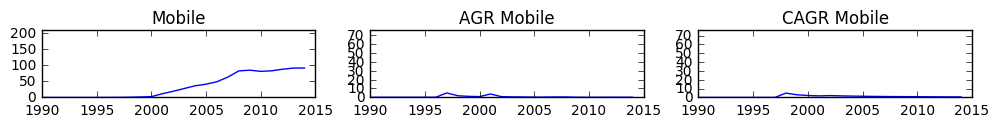

Albania


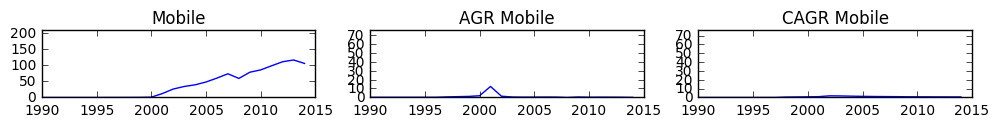

Romania


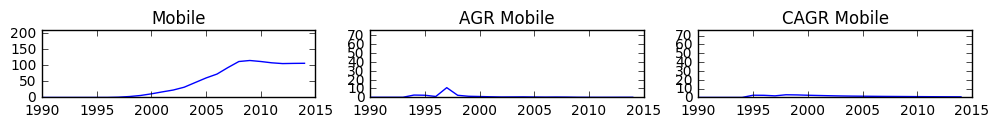

Serbia


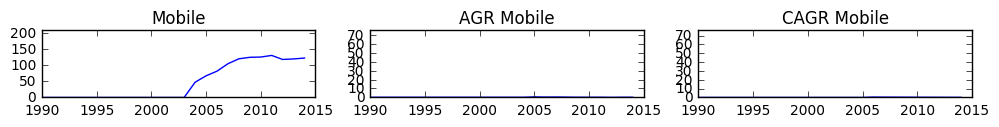

Ukraine


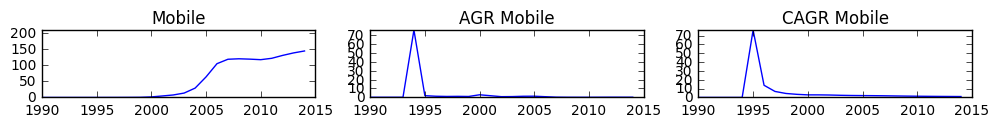

Belarus


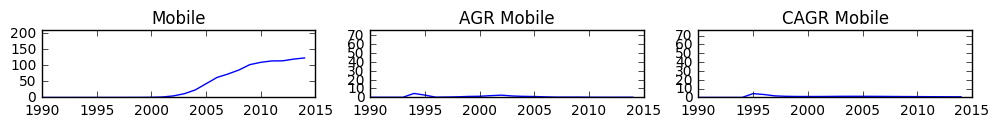

== Group 4 ================================
Czechia


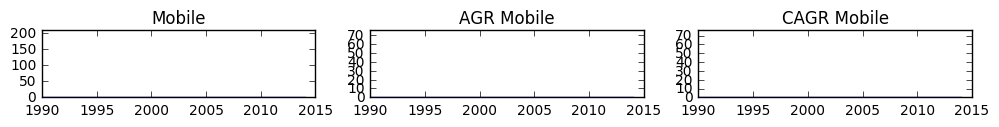

Slovakia


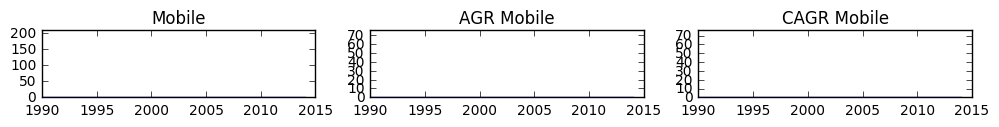

== Group 5 ================================
Lithuania


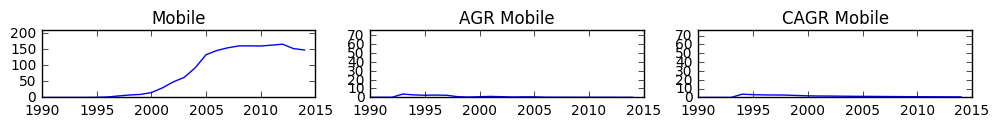

Poland


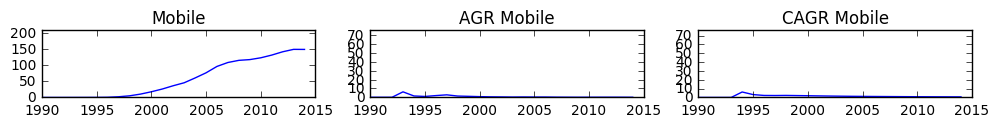

Italy


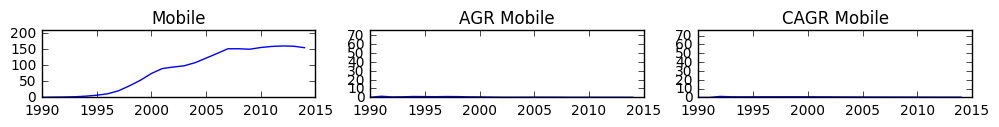

Montenegro


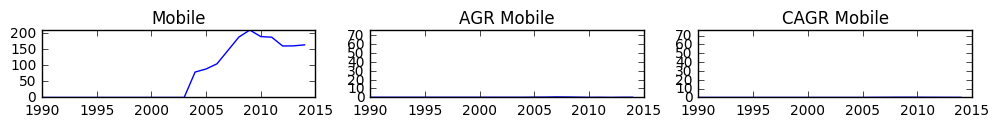

Bulgaria


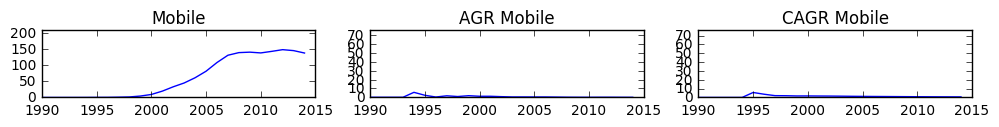

== Group 6 ================================
Finland


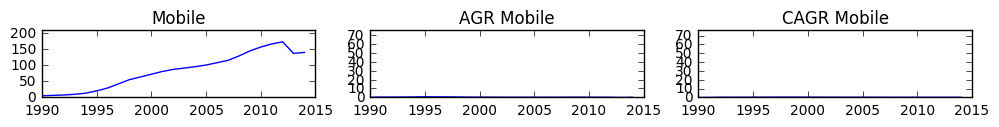

Sweden


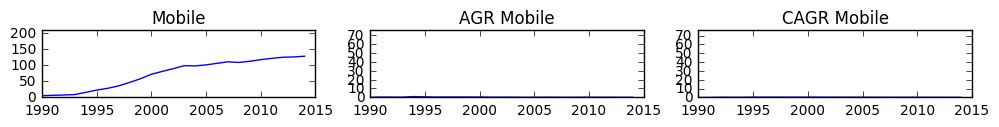

Faroe Islands


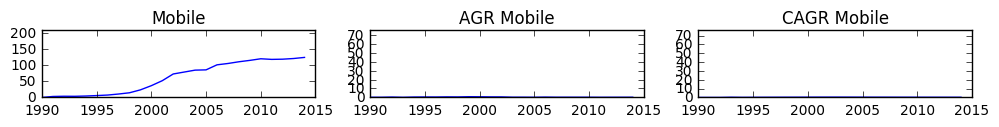

Iceland


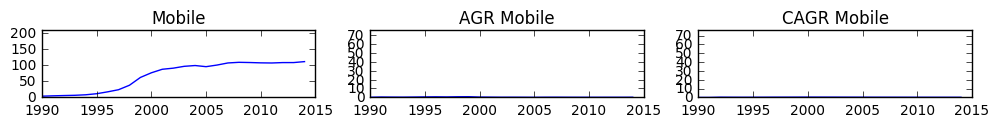

Austria


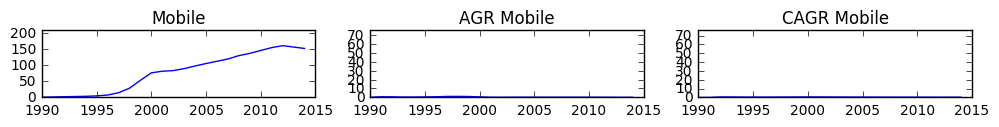

Luxembourg


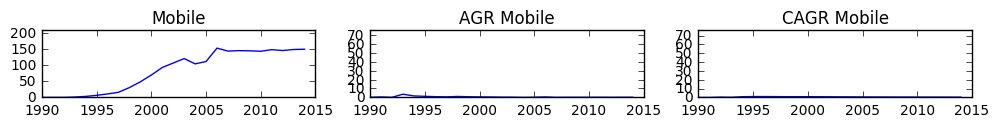

Norway


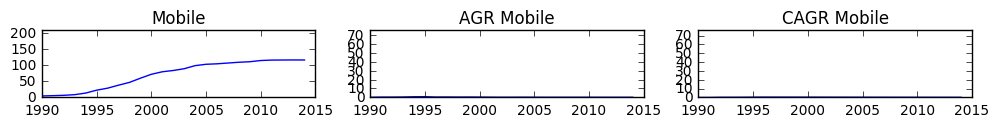

Estonia


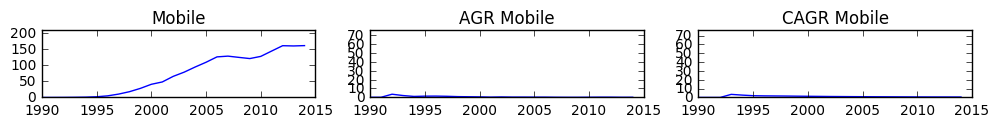

Denmark


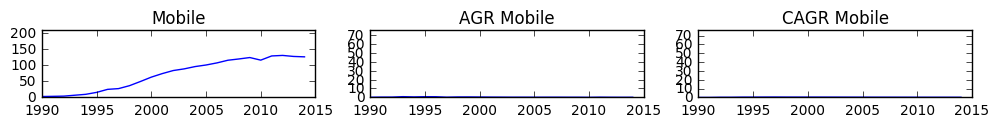

Switzerland


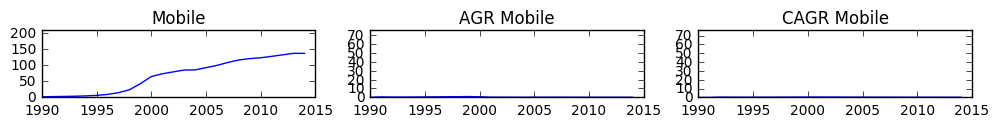

Germany


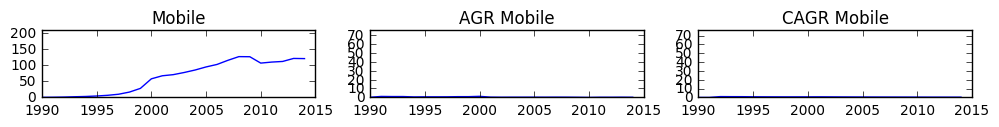

Netherlands


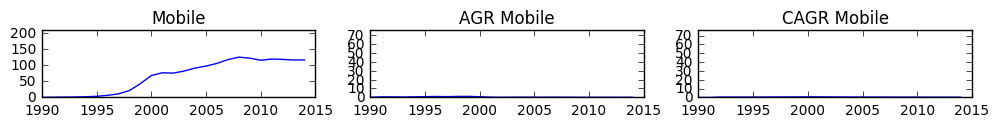

In [91]:
column = 1
x = np.arange(years['min'], years['max'], 1);
for group in range(0,totGroups):
    print("== Group", group, "================================")
    for name in [row for row in mergedata if row[totColumns+1]==group]:
        #y = countriesPlot[name[0]]
        #plt.figure(figsize=(3,1))
        #plt.title(name[0] + " AGR for Fixed")
        #plt.plot(x, y)
        #plt.show()             
        print(name[0])
        plt.figure(figsize=(12,4))      
        plt.subplot(434)
        plt.title("Mobile")
        plt.ylim(ymin[column],ymax[column])
        plt.plot(x, countriesPlot[name[0]][column])
        plt.subplot(435)
        plt.title("AGR Mobile")
        plt.ylim(ymin[column+3],ymax[column+3])
        plt.plot(x, countriesPlot[name[0]][column+3])
        plt.subplot(436)
        plt.title("CAGR Mobile")
        plt.ylim(ymin[column+6],ymax[column+6])
        plt.plot(x, countriesPlot[name[0]][column+6])        
        plt.show()